In [161]:
import yfinance as yf
from binance import Client

In [113]:
def getStock(tic,start_period):
    ticker = yf.Ticker(tic)
    df = ticker.history(start=start_period)
    return df.values[:,:4],df.index

In [114]:
def getMonthly(tic,period):
    ticker = yf.Ticker(tic)
    df = ticker.history(period=period)
    df['month'] = [d.month for d in df.index]
    df = df.groupby(['month']).mean()
    return df.values[:,:4],df.index

In [194]:
def getBTC(tic,start_period):
    #api_key = os.environ['API_KEY']
    #api_secret = os.environ['API_SECRET']
    client = Client()
    klines = client.get_historical_klines(tic, Client.KLINE_INTERVAL_1DAY, start_period, limit=1000)
    df = pd.DataFrame(klines, columns=['OpenTime', 'Open', 'High', 'Low', 'Close', 'Volume', 'CloseTime', 'QuoteVolume',
                                       'NumTrades', 'BuyBaseVolume', 'BuyQuoteVolume', 'Other']
                      ,dtype=np.float32)
    df['DateTime'] = df['OpenTime'].apply(lambda x: datetime.fromtimestamp(x / 1000))
    df = df.set_index('DateTime')
    return df.values[:, 1:5], df.index


In [115]:
stock = 'BTC-USD'
data,ts = getStock(stock,'2017-12-01')

In [196]:
stock = 'BTCUSDT'
data,ts = getBTC(stock,'2017-12-01')

In [234]:
from decimal import *
df = pd.DataFrame(client.get_ticker())
price = float(df[df.symbol == 'BTCUSDT']['lastPrice'].values[0])
Decimal(100/price)

Decimal('0.0021317152761701090891988119579991689533926546573638916015625')

In [197]:
from All_Functions_Master_File import rsi,adder,ma

In [198]:
my_data = adder(data,5)
my_data = rsi(my_data,14,3,4)
my_data = ma(my_data,20,4,5)


/Users/kahingleung/PycharmProjects/timeseries/All_Functions_Master_File.py:168: RuntimeWarning: Mean of empty slice.
  Data[i, where] = (Data[i - lookback + 1:i + 1, close].mean())
/Users/kahingleung/PycharmProjects/timeseries/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [199]:
my_data[1:10,:]

array([[9131.33984375, 9474.        , 8823.        , 9150.        ,
          42.03547423,   48.2715354 ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [9151.91992188, 9333.78027344, 7900.27978516, 8170.        ,
          35.88991907,   47.7392711 ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [8184.00976562, 8430.        , 7650.        , 8240.98046875,
          36.61276287,   47.13987105,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [8240.98046875, 8611.63964844, 7900.        , 8260.        ,
          36.81833057,   46.68126327,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [8260.        , 8348.62011719, 7721.99023438, 7824.79980469,
          34.09373771,   46.11783355,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [7824.00976562, 8317.40039062, 7322.       

In [200]:
from datetime import datetime
ts = ts[-1*len(my_data):]
mth = [d.month for d in ts]
yr = [d.year for d in ts]
wd = [d.weekday() for d in ts]
wk = [d.isocalendar()[1] for d in ts]
day = [d.day for d in ts]

In [201]:
import pandas as pd
df = pd.DataFrame({'Y': my_data[:,5], 'month': mth, 'year': yr, 'weekday': wd, 'weeknum': wk, 'day': day})
dfm = df.groupby(['month']).mean().reset_index()
dfwd = df.groupby(['weekday']).mean().reset_index()
dfwk = df.groupby(['weeknum']).mean().reset_index()
dfymd = df[['Y','year','month']].groupby(['year','month']).mean().reset_index()

In [202]:
dfymd.merge(dfm[['Y','month']],  on='month',suffixes=['_true','_pred']).sort_values(by=['year','month']).reset_index()

,index,year,month,Y_true,Y_pred
0,0,2018,3,43.817560,51.001256
1,4,2018,4,43.488174,54.719182
2,8,2018,5,52.448681,57.720964
3,12,2018,6,37.974393,48.565558
4,16,2018,7,48.033188,50.299455
5,20,2018,8,48.921584,57.167338
6,24,2018,9,48.490876,49.089036
7,28,2018,10,49.204017,50.201428
8,32,2018,11,39.726726,55.097774
9,36,2018,12,28.838676,43.451236


In [203]:
df_pred = dfymd.merge(dfm[['Y','month']],  on='month',suffixes=['_true','_pred']).sort_values(by=['year','month']).reset_index()
Y_true = df_pred['Y_true'].values
Y_pred = df_pred['Y_pred'].values
Y18 = df_pred[df_pred.year == 2018]['Y_pred']
Y19 = df_pred[df_pred.year == 2019]['Y_pred']
Y20 = df_pred[df_pred.year == 2020]['Y_pred']
Y21 = df_pred[df_pred.year == 2021]['Y_pred']

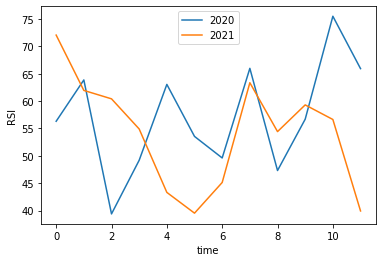

In [204]:
import matplotlib.pyplot as plt
# plot the co2 data
fig = plt.figure()
df1 = df_pred[df_pred.year == 2020].reset_index()
df2 = df_pred[df_pred.year == 2021].reset_index()
plt.plot(df1.index,df1['Y_true'], label="2020")
plt.plot(df2.index,df2['Y_true'], label="2021")
plt.ylabel('RSI')
plt.xlabel('time')
plt.legend()

In [205]:
from sklearn import metrics
print(metrics.mean_absolute_error(Y_true,Y_pred))

8.206933781307162


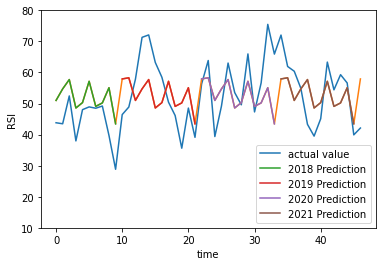

In [206]:
import matplotlib.pyplot as plt
# plot the co2 data
fig = plt.figure()
#plt.plot(df19.index,df19.values)
plt.plot(df_pred.index,Y_true, label="actual value")
plt.plot(df_pred.index,Y_pred)
plt.plot(Y18.index,Y18.values, label="2018 Prediction")
plt.plot(Y19.index,Y19.values, label="2019 Prediction")
plt.plot(Y20.index,Y20.values, label="2020 Prediction")
plt.plot(Y21.index,Y21.values, label="2021 Prediction")
plt.ylabel('RSI')
plt.xlabel('time')
plt.ylim(10, 80)
plt.legend()

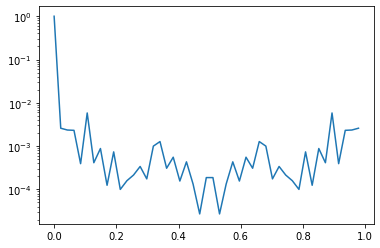

In [207]:
import numpy as np

y = Y_true #my_data[:,5]
x = list(range(len(y)))

# apply fast fourier transform and take absolute values
f=abs(np.fft.fft(y))

# get the list of frequencies
num=np.size(x)
freq = [i / num for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.semilogy(freq,nspectrum)

In [208]:
len(df[df.year == 2020])

366

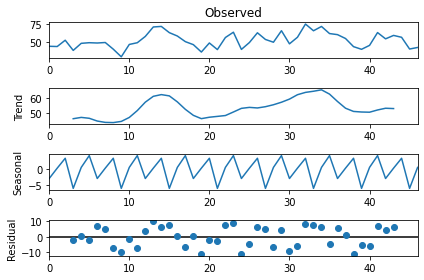

In [209]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(Y_true,period=6)
resplot = res.plot()


In [210]:
r = res.resid
r = r[~np.isnan(r)]

In [211]:
from statsmodels.tsa.stattools import adfuller

In [212]:
result = adfuller(r)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.565997
p-value: 0.000149
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613


In [213]:
result[1]

0.0001491506936380386

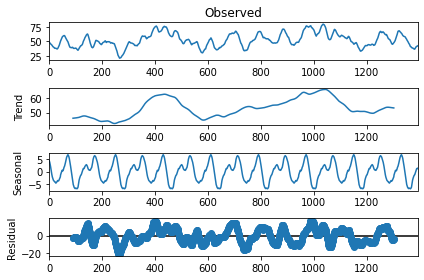

In [214]:
import statsmodels.api as sm
y = my_data[:,5]
res = sm.tsa.seasonal_decompose(y,period=180)
resplot = res.plot()

In [215]:
r = res.resid
r = r[~np.isnan(r)]

In [216]:
from statsmodels.tsa.stattools import adfuller

In [217]:
result = adfuller(r)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.822482
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [218]:
result[1]

4.1518133376286197e-07

(array([ 7.,  1.,  2.,  1.,  2.,  2.,  7.,  9.,  4.,  4.,  9., 11., 24.,
        41., 30., 35., 41., 51., 34., 43., 31., 29., 41., 35., 50., 49.,
        25., 21., 34., 39., 36., 33., 54., 42., 26., 28., 41., 41., 37.,
        38., 32., 14., 16., 11., 14., 12.,  5.,  7., 10.,  4.]),
 array([-2.08032613e+01, -2.00325509e+01, -1.92618404e+01, -1.84911300e+01,
        -1.77204196e+01, -1.69497092e+01, -1.61789987e+01, -1.54082883e+01,
        -1.46375779e+01, -1.38668675e+01, -1.30961570e+01, -1.23254466e+01,
        -1.15547362e+01, -1.07840258e+01, -1.00133153e+01, -9.24260491e+00,
        -8.47189448e+00, -7.70118406e+00, -6.93047363e+00, -6.15976321e+00,
        -5.38905278e+00, -4.61834236e+00, -3.84763193e+00, -3.07692151e+00,
        -2.30621108e+00, -1.53550066e+00, -7.64790234e-01,  5.92019124e-03,
         7.76630616e-01,  1.54734104e+00,  2.31805147e+00,  3.08876189e+00,
         3.85947232e+00,  4.63018274e+00,  5.40089317e+00,  6.17160359e+00,
         6.94231402e+00,  7.7130

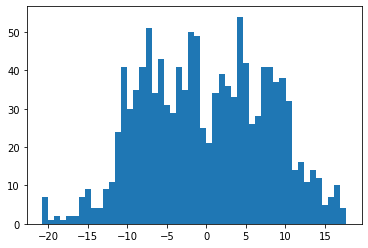

In [219]:
plt.hist(r, bins = 50)

In [220]:
from prophet import Prophet

In [221]:
df

,Y,month,year,weekday,weeknum,day
0,48.679927,3,2018,0,11,12
1,48.271535,3,2018,1,11,13
2,47.739271,3,2018,2,11,14
3,47.139871,3,2018,3,11,15
4,46.681263,3,2018,4,11,16
...,...,...,...,...,...,...
1388,41.110663,12,2021,2,52,29
1389,41.635162,12,2021,3,52,30
1390,41.666307,12,2021,4,52,31
1391,41.883497,1,2022,5,52,1


In [222]:
df['ds'] = df.apply(lambda x: datetime(int(x['year']),int(x['month']),int(x['day'])),axis = 1)
df['y'] = df['Y']

In [223]:
df

,Y,month,year,weekday,weeknum,day,ds,y
0,48.679927,3,2018,0,11,12,2018-03-12,48.679927
1,48.271535,3,2018,1,11,13,2018-03-13,48.271535
2,47.739271,3,2018,2,11,14,2018-03-14,47.739271
3,47.139871,3,2018,3,11,15,2018-03-15,47.139871
4,46.681263,3,2018,4,11,16,2018-03-16,46.681263
...,...,...,...,...,...,...,...,...
1388,41.110663,12,2021,2,52,29,2021-12-29,41.110663
1389,41.635162,12,2021,3,52,30,2021-12-30,41.635162
1390,41.666307,12,2021,4,52,31,2021-12-31,41.666307
1391,41.883497,1,2022,5,52,1,2022-01-01,41.883497


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -23.9055
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2324.08    0.00275502       86.3041      0.8383      0.8383      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2332.8     0.0468055       165.019          10           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2355.74     0.0362907       117.898           1           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     375       2362.24    0.00157611       82.2131   1.752e-05       0.001      488  LS failed, Hessian reset 
     399       2362.85   0.000150191       107.019      0.4994      0.4994      515   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2363.28    5.1634e-05    

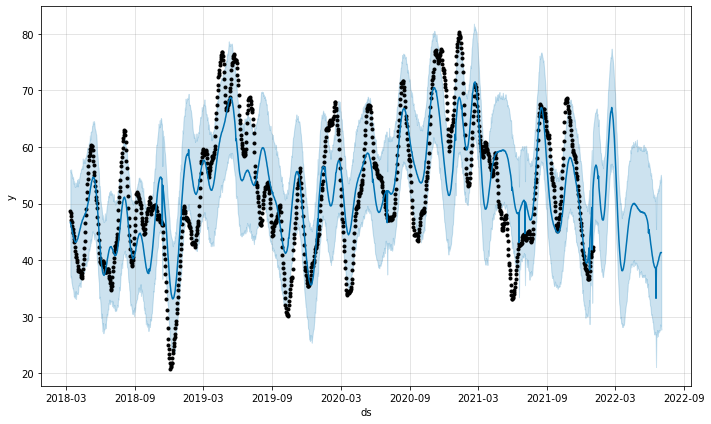

In [224]:
dfph = df[['ds','y']]
m = Prophet(yearly_seasonality=True)
m.add_seasonality(name='half_year', period=182,fourier_order=5)
m.add_country_holidays(country_name='US')
m.fit(dfph)
future = m.make_future_dataframe(periods=182)
forecast = m.predict(future)
fig1 = m.plot(forecast)

In [225]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-12,46.805753,37.345884,56.005672,46.805753,46.805753,0.0,0.0,0.0,0.0,...,0.043801,0.043801,0.043801,-38.433434,-38.433434,-38.433434,0.0,0.0,0.0,46.693429
1,2018-03-13,46.793307,36.923447,55.508680,46.793307,46.793307,0.0,0.0,0.0,0.0,...,-0.010003,-0.010003,-0.010003,-38.216448,-38.216448,-38.216448,0.0,0.0,0.0,46.376769
2,2018-03-14,46.780861,37.135711,56.042671,46.780861,46.780861,0.0,0.0,0.0,0.0,...,0.014326,0.014326,0.014326,-37.794090,-37.794090,-37.794090,0.0,0.0,0.0,46.107689
3,2018-03-15,46.768415,36.079927,55.372244,46.768415,46.768415,0.0,0.0,0.0,0.0,...,-0.025930,-0.025930,-0.025930,-37.187462,-37.187462,-37.187462,0.0,0.0,0.0,45.751905
4,2018-03-16,46.755970,35.833825,55.212256,46.755970,46.755970,0.0,0.0,0.0,0.0,...,0.063597,0.063597,0.063597,-36.418316,-36.418316,-36.418316,0.0,0.0,0.0,45.512655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,2022-06-29,45.609860,27.580078,54.209999,37.691962,53.433580,0.0,0.0,0.0,0.0,...,0.014326,0.014326,0.014326,2.332461,2.332461,2.332461,0.0,0.0,0.0,40.918578
1571,2022-06-30,45.584922,28.651958,53.734878,37.607582,53.476132,0.0,0.0,0.0,0.0,...,-0.025930,-0.025930,-0.025930,2.695398,2.695398,2.695398,0.0,0.0,0.0,41.083602
1572,2022-07-01,45.559984,28.335139,54.753424,37.511469,53.501776,0.0,0.0,0.0,0.0,...,0.063597,0.063597,0.063597,2.961617,2.961617,2.961617,0.0,0.0,0.0,41.333827
1573,2022-07-02,45.535047,28.289502,55.102658,37.422313,53.510485,0.0,0.0,0.0,0.0,...,-0.010370,-0.010370,-0.010370,3.133895,3.133895,3.133895,0.0,0.0,0.0,41.367513


In [58]:
len(forecast.iloc[-100:]['yhat'].values)

100

In [108]:
pred_period = 5
pred = forecast.iloc[-1*pred_period:]['yhat'].values

In [111]:
pred[0]

68.18571635907044